In [38]:
from funpymodeling import status, freq_tbl, profiling_num
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset = pd.read_csv("../datasets/adapted_data/Churn_Modelling_adapted.csv")
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,True,True,101348.88,True
1,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False
2,502,France,Female,42,8,159660.80,3,True,False,113931.57,True
3,699,France,Female,39,1,0.00,2,False,False,93826.63,False
4,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,True,False,96270.64,False
9996,516,France,Male,35,10,57369.61,1,True,True,101699.77,False
9997,709,France,Female,36,7,0.00,1,False,True,42085.58,True
9998,772,Germany,Male,42,3,75075.31,2,True,False,92888.52,True


In [40]:
status(dataset)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,CreditScore,0,0.0,0,0.0000,460,int64
1,Geography,0,0.0,0,0.0000,3,object
2,Gender,0,0.0,0,0.0000,2,object
3,Age,0,0.0,0,0.0000,70,int64
4,Tenure,0,0.0,413,0.0413,11,int64
5,Balance,0,0.0,3617,0.3617,6382,float64
6,NumOfProducts,0,0.0,0,0.0000,4,int64
7,HasCrCard,0,0.0,2945,0.2945,2,bool
8,IsActiveMember,0,0.0,4849,0.4849,2,bool
9,EstimatedSalary,0,0.0,0,0.0000,9999,float64


In [54]:
dataset.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard             bool
IsActiveMember        bool
EstimatedSalary    float64
Exited                bool
dtype: object

## 1- Análisis Univariado

### 1.1- EstimatedSalary

In [41]:
profiling_num(dataset["EstimatedSalary"])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,EstimatedSalary,100090.239881,57510.492818,0.574586,1842.8253,9851.8185,51002.11,100193.915,149388.2475,190155.3755,198069.7345


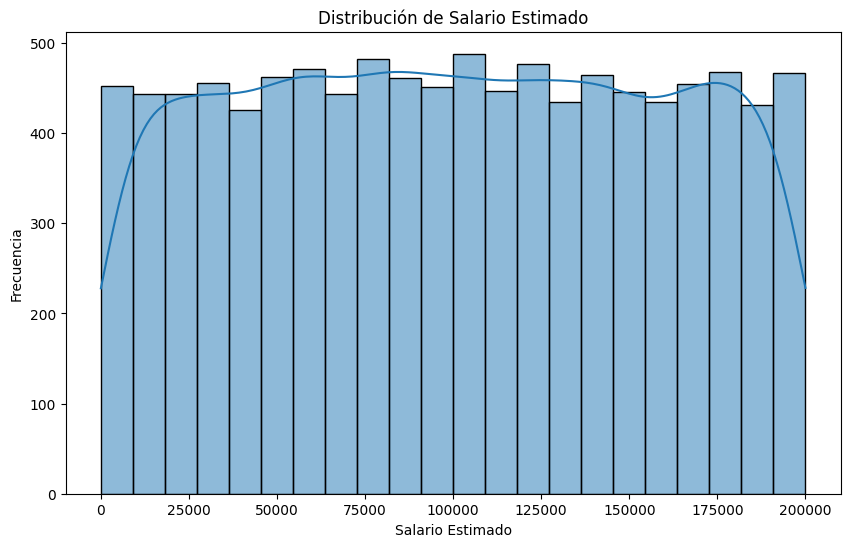

In [42]:
#graficar histograma de estimated salary
plt.figure(figsize=(10,6))
sns.histplot(dataset["EstimatedSalary"], kde=True)
plt.title('Distribución de Salario Estimado')
plt.xlabel('Salario Estimado')
plt.ylabel('Frecuencia')
plt.show()


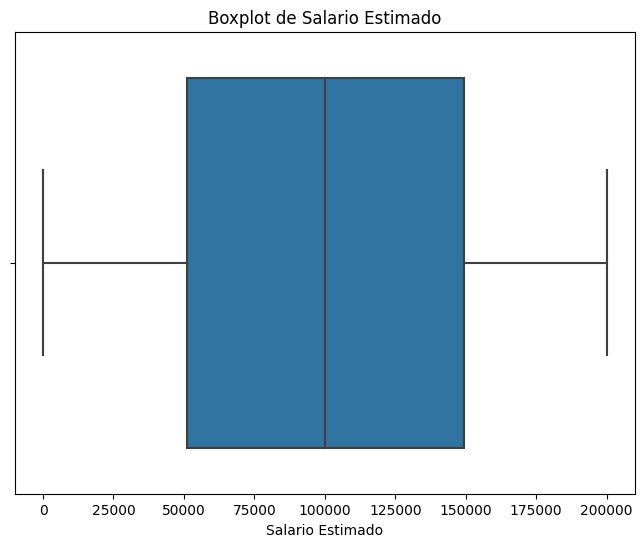

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset["EstimatedSalary"])
plt.title('Boxplot de Salario Estimado')
plt.xlabel('Salario Estimado')
plt.show()

### 1.2- Balance

In [44]:
profiling_num(dataset["Balance"])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Balance,76485.889288,62397.405202,0.815803,0.0,0.0,0.0,97198.54,127644.24,162711.669,185967.9854


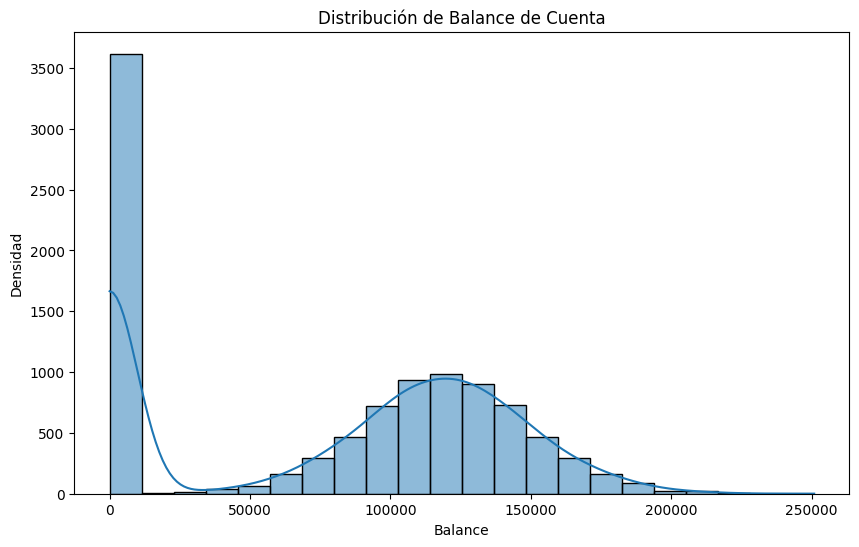

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(dataset["Balance"], kde=True)
plt.title('Distribución de Balance de Cuenta')
plt.xlabel('Balance')
plt.ylabel('Densidad')
plt.show()

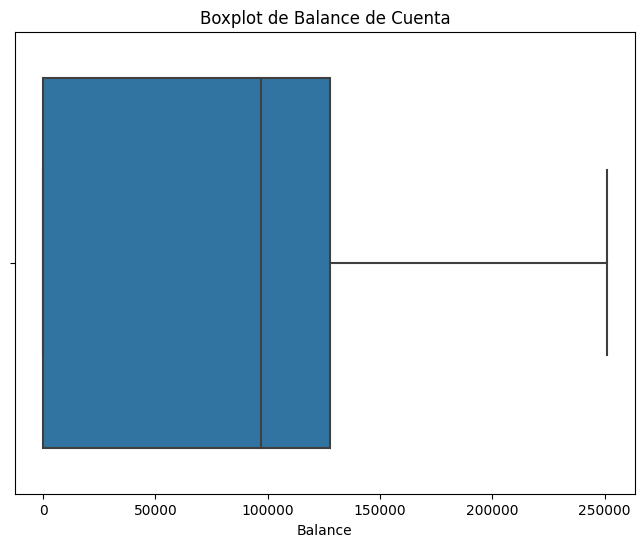

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset["Balance"])
plt.title('Boxplot de Balance de Cuenta')
plt.xlabel('Balance')
plt.show()

En el balance podemos notar dos distribuciones, una distribución normal centrada en 125000 aproximadamente, y un pico masivo en cero.  
Es decir, podemos ver dos grupos, un grupo de clientes que mantienen algo de dinero en el banco, y otro grupo de clientes que no usan la cuenta para tener saldo.

### 1.3- CreditScore

In [47]:
profiling_num(dataset["CreditScore"])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,CreditScore,650.5288,96.653299,0.148577,432.0,489.0,584.0,652.0,718.0,812.0,850.0


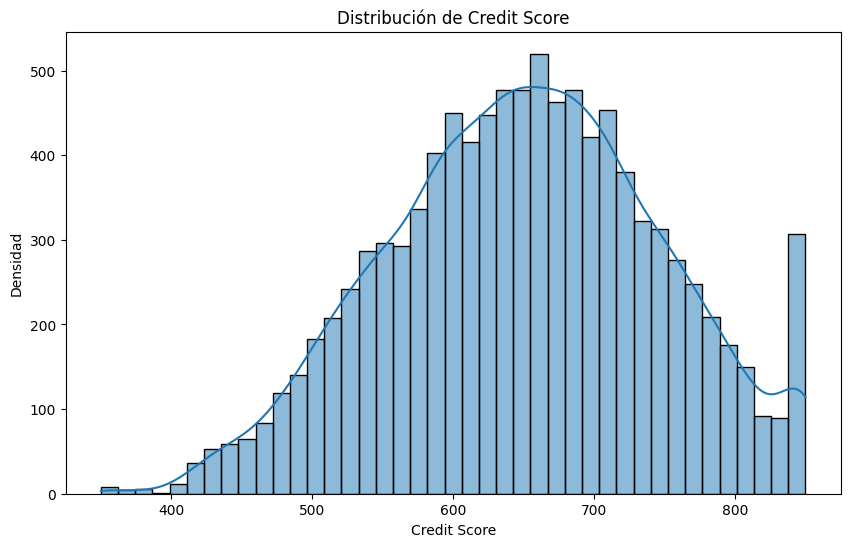

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(dataset["CreditScore"], kde=True)
plt.title('Distribución de Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Densidad')
plt.show()

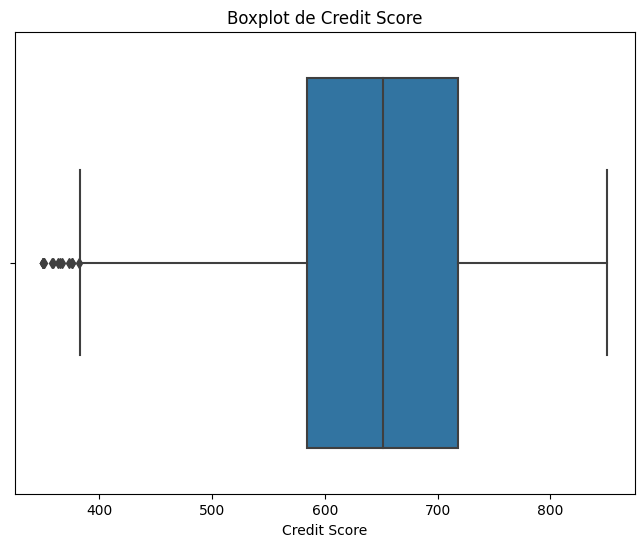

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset["CreditScore"])
plt.title('Boxplot de Credit Score')
plt.xlabel('Credit Score')
plt.show()

En el histograma, podemos ver una distribución casi normal (una "campana de Gauss") centrada entre 600 y 700.  
Y en el boxplot, la caja está en el medio y podemos ver algunos outliers con puntajes muy bajos.

### 1.4- Exited (Variable objetivo)

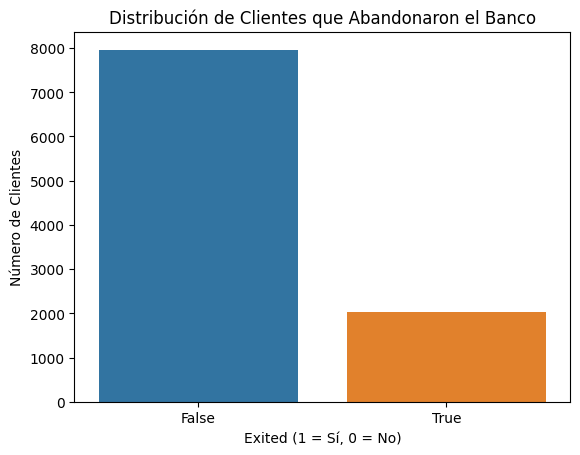

In [50]:
sns.countplot(x='Exited', data=dataset)
plt.title('Distribución de Clientes que Abandonaron el Banco')
plt.xlabel('Exited (1 = Sí, 0 = No)')
plt.ylabel('Número de Clientes')
plt.show()

Podemos notar un gran desbalanceo de clases en la variable objetivo, aproximadamente hay 4 veces más de personas que no se fueron que las que se fueron.

A nosotros nos interesa conocer los que se fueron, por lo que, vamos a tener que realizar Oversampling (SMOTE) antes de entrenar el modelo

## 2- Análisis Bivariado

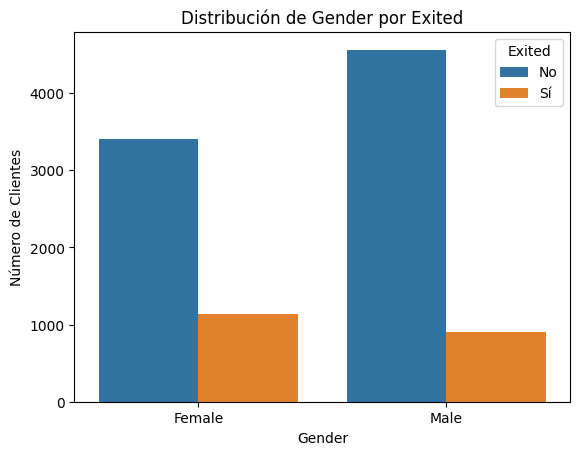

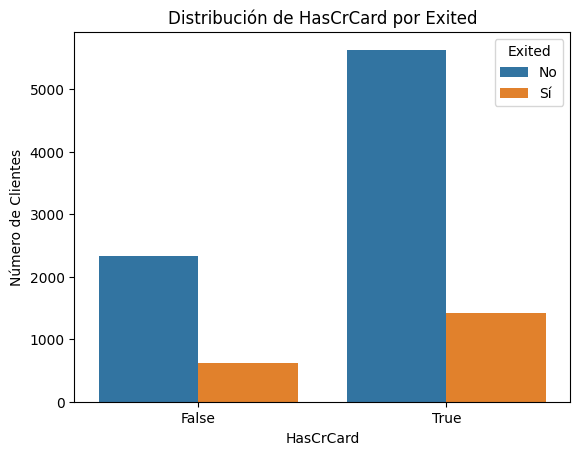

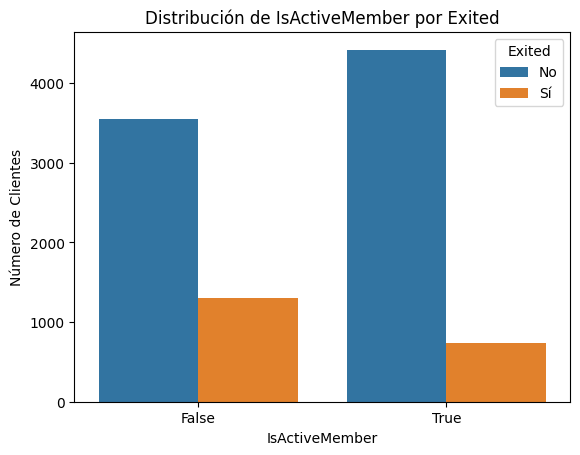

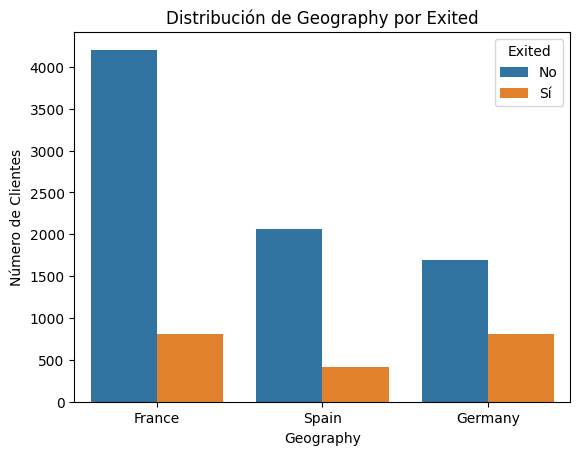

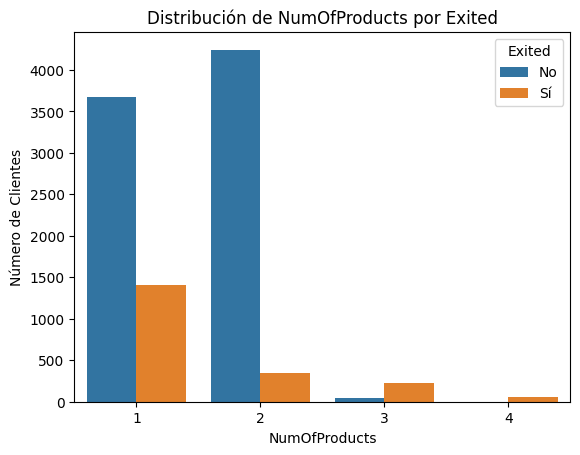

In [51]:
categorical_cols = ['Gender', 'HasCrCard', 'IsActiveMember', 'Geography', 'NumOfProducts']
for col in categorical_cols:
    sns.countplot(x=col, hue='Exited', data=dataset)
    plt.title(f'Distribución de {col} por Exited')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Exited', labels=['No', 'Sí'])
    plt.show() 


Las observaciones que podemos sacar son las siguientes:
- Si el cliente es una mujer, es más probable que se vaya, ya que, la tasa de abandono es más alta

- Que un cliente tenga tarjeta de crédito o no, no influye prácticamente en si el cliente abandonó o no.

- Que un cliente sea miembro sea activo o no, no parece influir de manera relevante en si el cliente abandonó o no.

- En Francia son más propensos a quedarse, que en Alemania, ya que, en Francia podemos notar que la cantidad de clientes que se quedan es 4 veces mayor que los que se van.  
Mientras que en Alemania se quedan el doble de personas que las que se van, es decir, una tercera parte se va en Alemania.

- Luego en la distribución de productos podemos ver que gran parte de los clientes con 3 productos o más, suelen irse.  
Otra observación notable es que es más probable que no se vayan si compran 2 productos.

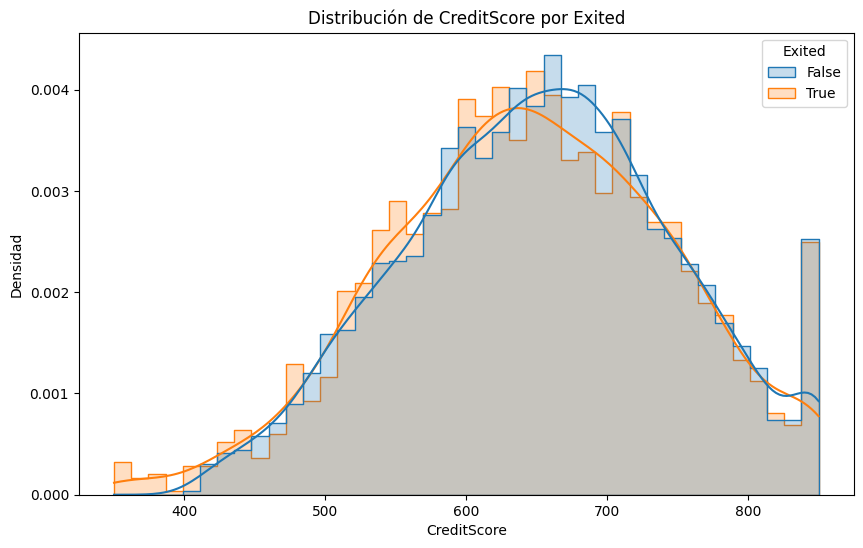

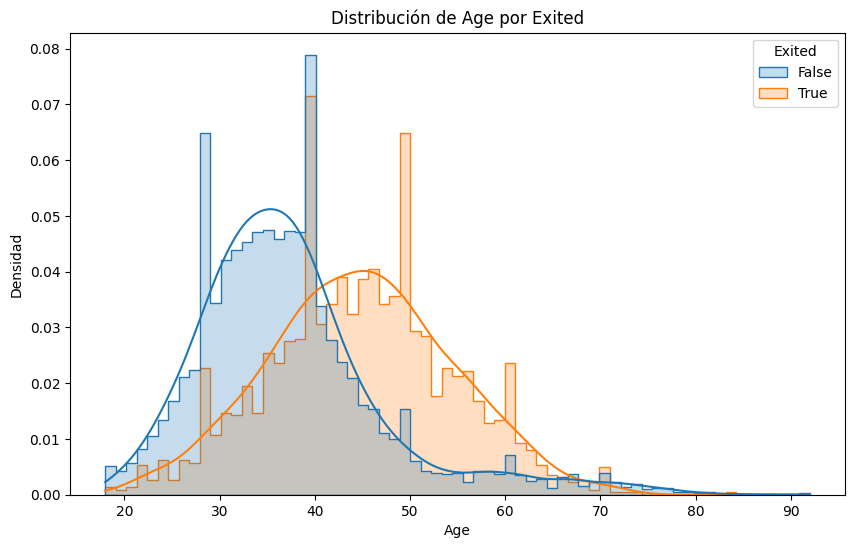

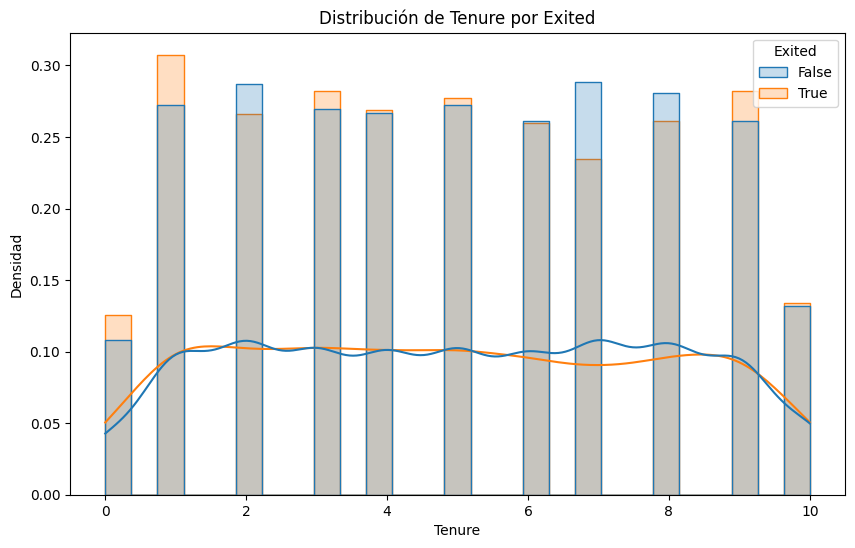

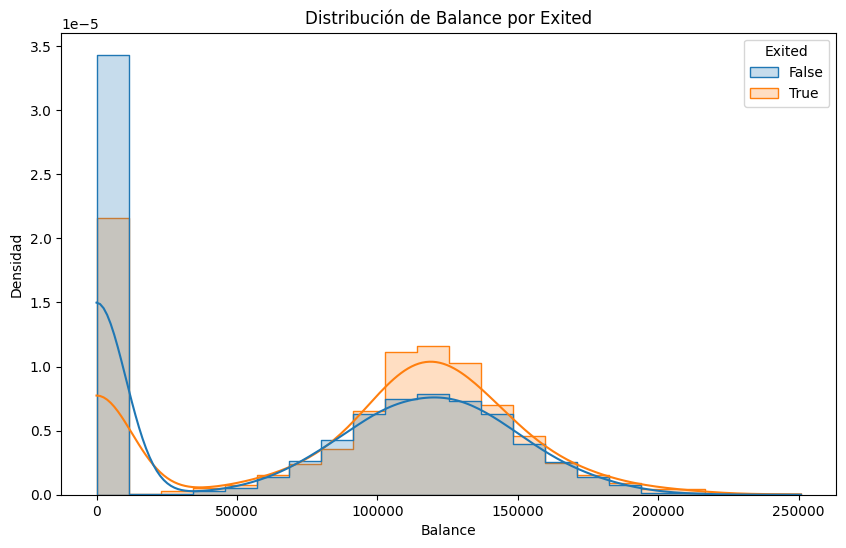

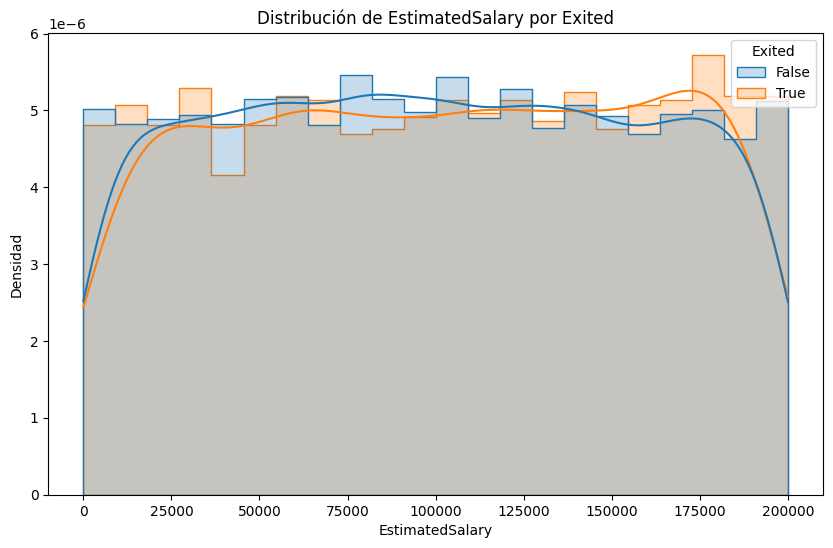

In [52]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data=dataset, x=col, hue='Exited', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {col} por Exited')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()


Las podemos observaciones que podemos sacar son:
- La distribución en credit score es similar tanto si el cliente se va cómo si no.
- La distribución en el salario estimado es similar tanto si el cliente se va cómo si no.
- La distribución en `Tenure` es similar tanto si el cliente se va cómo si no.
- En la edad podemos ver dos distribuciones notables:
    - Una centrada entre 30 y 40 años, que nos muestra que los clientes con esa edad suelen quedarse
    - Una centrada entre 40 y 50 años que muestra que las personas que se van suelen irse luego de los 45 años aproximadamente.  
  
  Otro detalle importante es que podemos ver 3 picos muy notorios, a los 30 años, a los 40 años y a los 50 años: 
    - A los 30 años es extremadamente probable que se queden.
    - A los 40 años suele haber un poco más de personas que se quedan.
    - A los 50 años es extremadamente probable que se vayan.
- En el balance, si no tienen saldo en la cuenta es más probable que se queden, mientras que si tienen un balance entre 100000 y 150000 es más probable que se vayan.

## 3- Correlación

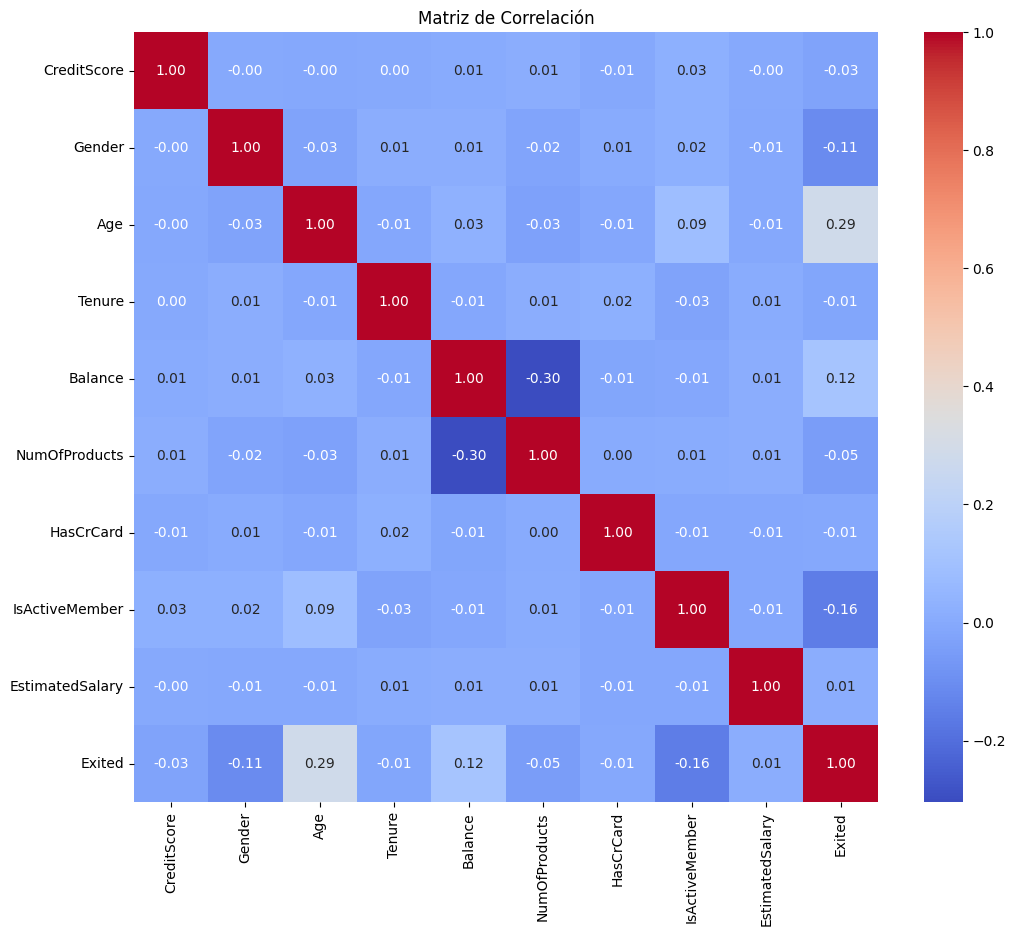

In [53]:
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})
dataset = dataset.drop(["Geography"], axis=1)

plt.figure(figsize=(12,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

No hay ninguna correlación fuerte, pero notamos lo siguiente:
- `Balance` y `NumOfProducts` tienen la correlación negativa más fuerte, es decir, los clientes con más productos tienden a tener menos saldo en cuenta, y viceversa.  

- `Age` y `Exited` tienen la correlación positiva más alta, esto confirma lo que vimos en el histograma, es decir, a medida que aumente la edad también tiende a aumentar la posibilidad de que se vaya.